In [1]:
import numpy as np
import matplotlib.pyplot as plt

filename_list = ['2021-03-03_IAPP_2n5_sliceB_0V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_10V_02_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_20V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_30V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_40V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_50V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_60V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_70V_dt_extracted.txt']

datastore = {}
for filename in filename_list:
    with open (filename, 'r') as f:
        filenameparts = filename.split('_')
        voltage = filenameparts[4].replace('V', '')
        voltage = int(voltage)
        arrtime = []
        intensity = []
        for dataline in f:
            dataline = dataline.replace('\n', '')
            arrtime_intensity = dataline.split('\t')
            arrtime.append(float(arrtime_intensity[0]))
            intensity.append(float(arrtime_intensity[1]))         
            pairs = list(zip(arrtime, intensity))
        datastore[voltage] = pairs
#print(len(arrtime))
#print(len(intensity))

intensity0 = [0]*200
pairs0 = list(zip(arrtime, intensity0))

datastore[-10] = pairs0

for k, v in datastore.items():
    print(k)

0
10
20
30
40
50
60
70
-10


In [2]:
arrts_for2d = []
intens_for2d = []
volts_for2d = []

for k, pair in sorted(datastore.items()):
    for i in pair:
        arrts_for2d.append(i[0])
        intens_for2d.append(i[1])
        volts_for2d.append(k)
                

[-10   0  10  20  30  40  50  60  70]
-10
[-1.00000000e+01 -9.59798995e+00 -9.19597990e+00 -8.79396985e+00
 -8.39195980e+00 -7.98994975e+00 -7.58793970e+00 -7.18592965e+00
 -6.78391960e+00 -6.38190955e+00 -5.97989950e+00 -5.57788945e+00
 -5.17587940e+00 -4.77386935e+00 -4.37185930e+00 -3.96984925e+00
 -3.56783920e+00 -3.16582915e+00 -2.76381910e+00 -2.36180905e+00
 -1.95979899e+00 -1.55778894e+00 -1.15577889e+00 -7.53768844e-01
 -3.51758794e-01  5.02512563e-02  4.52261307e-01  8.54271357e-01
  1.25628141e+00  1.65829146e+00  2.06030151e+00  2.46231156e+00
  2.86432161e+00  3.26633166e+00  3.66834171e+00  4.07035176e+00
  4.47236181e+00  4.87437186e+00  5.27638191e+00  5.67839196e+00
  6.08040201e+00  6.48241206e+00  6.88442211e+00  7.28643216e+00
  7.68844221e+00  8.09045226e+00  8.49246231e+00  8.89447236e+00
  9.29648241e+00  9.69849246e+00  1.01005025e+01  1.05025126e+01
  1.09045226e+01  1.13065327e+01  1.17085427e+01  1.21105528e+01
  1.25125628e+01  1.29145729e+01  1.33165829e+01

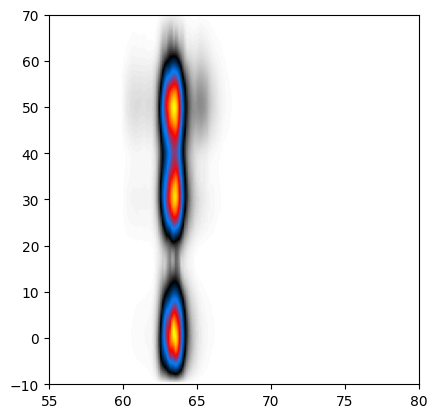

In [3]:
from scipy.interpolate import interp2d, RectBivariateSpline, CloughTocher2DInterpolator
from matplotlib.colors import LinearSegmentedColormap

#X2d = np.array(arrts_for2d)
#Y2d = np.array(volts_for2d)
#Z2d = np.array(intens_for2d)

X2d = np.array(sorted(set(arrts_for2d))) #flat list
Y2d = np.array(sorted(set(volts_for2d))) #flat list 0 to 70 once
Z2d = np.array(intens_for2d)
Z2d = Z2d.reshape(len(Y2d), len(X2d)).T

print(Y2d)

#interp_func = interp2d(X2d, Y2d, Z2d, kind='cubic', fill_value=0.0)
#interp_func = RectBivariateSpline(X2d, Y2d, Z2d, kx=3, ky=3, s=0)

x_grid, y_grid = np.meshgrid(X2d, Y2d) # n_grid , n_grid of coordinates
x_grid_flat = x_grid.ravel()  # Flatten to list
y_grid_flat = y_grid.ravel() 
stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1) # to get x,y pairs

ztest = Z2d.T.ravel()
nz = ztest.nonzero()

interp_func = CloughTocher2DInterpolator(stacked_points, ztest) # , kernel='gaussian', epsilon=0.1)

X_max = 80
X_min = X2d.min()
Y_min = Y2d.min()
Y_max = 70

print(Y_min)

#n_smooth = 100
n_smoothy = 200
n_smoothx = 200

X2d_plot = np.linspace(X_min, X_max, n_smoothx)
Y2d_plot = np.linspace(Y_min, Y_max, n_smoothy) 
print(Y2d_plot)

x_grid, y_grid = np.meshgrid(X2d_plot, Y2d_plot) # n_grid , n_grid of coordinates
x_grid_flat = x_grid.ravel()  # Flatten to list
y_grid_flat = y_grid.ravel() 
stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1) # to get x,y pairs

Intens2d_plot = interp_func(stacked_points).reshape(n_smoothx, n_smoothy)
#Intens2d_plot = interp_func(X2d_plot, Y2d_plot).T
Intens2d_plot = np.clip(Intens2d_plot, a_min = 0, a_max = None)

#Intens2d_plot = interp_func(X2d_plot, Y2d_plot)
print(Intens2d_plot.shape)

#density_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FFFFFF','#000080','#0080FF'], N=256)
density_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FFFFFF', '#000000','#0080FF','#FF0000','#FFFF00'], N=256)

fig, ax = plt.subplots()
x_range = (X_min, X_max) #min and max, effectively, cos it's sorted
y_range = (Y_min, Y_max)

aspect = (x_range[1] - x_range[0])/(y_range[1] - y_range[0])

#Intens2d_plot = np.clip(Intens2d_plot, 0.0, None)

ax.imshow(Intens2d_plot, cmap=density_colormap, origin='lower', extent=x_range + y_range, aspect=aspect, vmin=0.0)
plt.show()

In [4]:
Volts_new = Y2d_plot # np.linspace(0, 70, 200)

n,m = Intens2d_plot.shape

x_smootharrT_coords = []
y_smoothV_coords = []
smooth_intensities = []


for i in range(n):
    for j in range(m):
        intensity_value = int(Intens2d_plot[j,i])
        x_smootharrT_coords.append(X2d_plot[i])        
        y_smoothV_coords.append(Volts_new[j])
        smooth_intensities.append(intensity_value)
print(len(x_smootharrT_coords)) #40,000
print(len(y_smoothV_coords)) #40,000 i.e. 200*200
print(len(smooth_intensities)) #40,000 i.e. 200*200

smoothxycoords = list(zip(x_smootharrT_coords, y_smoothV_coords))
smoothxycoords = np.array(smoothxycoords)
smooth_intensities = np.array(smooth_intensities)

print(smoothxycoords.min(axis=0), smoothxycoords.max(axis=0))
print(smoothxycoords.shape, smooth_intensities.shape)

40000
40000
40000
[ 54.982 -10.   ] [80. 70.]
(40000, 2) (40000,)


(30.33412105812391, 1.5782466106810382, 47.230613065476376, 1.6939908768759222, 50.19103354887)
63.392210627992554 30.33412105812391 67 101 0.014309373019910107
63.66438667116622 1.5782466106810382 70 29 0.011718706209954079
63.70220984285568 47.230613065476376 70 143 0.01004936832887418
63.37869065303854 1.6939908768759222 67 30 0.015679032333014313
63.3311672043852 50.19103354887 67 150 0.01552302138997199


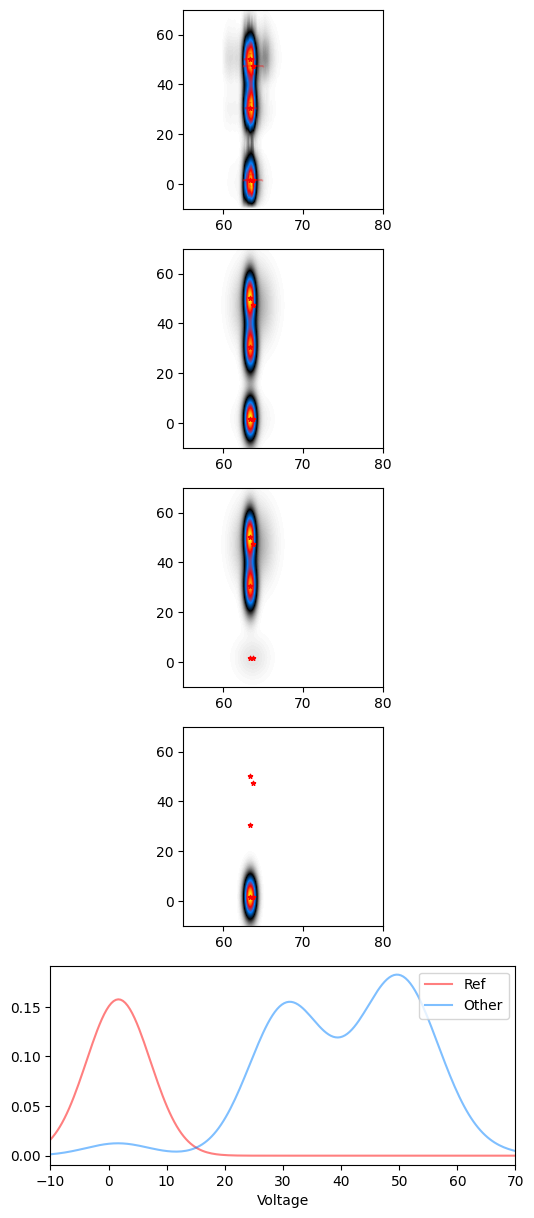

In [8]:
from pomegranate import GeneralMixtureModel, MultivariateGaussianDistribution, IndependentComponentsDistribution, NormalDistribution
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

class MinStdNormalDistributionX(NormalDistribution):
    def __init__(self, *args, **kw):
        kw['min_std'] = 0 #0.4 #0.1 #0.8 #1 #2#0.6
        NormalDistribution.__init__(self, *args, **kw)
class MinStdNormalDistributionY(NormalDistribution):
    def __init__(self, *args, **kw):
        kw['min_std'] = 0 #7 #8 #1 #5#11 ##stick w 10
        NormalDistribution.__init__(self, *args, **kw)

test_n_components = [5]

fig1, axarr = plt.subplots(5,len(test_n_components), squeeze=False)
fig1.set_size_inches(6,15)

gmmlist = [] #objects for 3,4,5 components
for i, n_comp in enumerate(test_n_components):
 
    gmm = GeneralMixtureModel.from_samples([MinStdNormalDistributionX, MinStdNormalDistributionY],
                                         n_comp, smoothxycoords, smooth_intensities, n_init=10, max_kmeans_iterations=50, 
                                          stop_threshold=0.1, lr_decay=0.5, verbose=False)
    gmmlist.append(gmm)
    df = (5 * n_comp) - 1
    lp = (gmm.log_probability(smoothxycoords) * smooth_intensities).sum() #sum, as in log space, normally porbs would multiply. 
    bic = float(df * np.log(len(smoothxycoords)) - 2.0 * lp) # For evaluating best n_comp
    
    # For independent x,y normals
    comp_params = [comp.parameters[0] for comp in gmm.distributions] # Selects IndependentComponentsDistribution for each Gaussian
    x_params = [cp[0].parameters for cp in comp_params] # NormalDistribution for X : Mean, Var pairs
    y_params = [cp[1].parameters for cp in comp_params] # NormalDistribution for Y : Mean, Var pairs
  
    x_vals_mean, x_vals_var = zip(*x_params) 
    y_vals_mean, y_vals_var = zip(*y_params) 
    
  # Sqrt for Var to Std
    x_vals_std = np.sqrt(x_vals_var)
    y_vals_std = np.sqrt(y_vals_var)

    print(y_vals_mean)
    
    x_points = X2d_plot # np.linspace(X_min, X_max, n_grid) 
    y_points = Y2d_plot # np.linspace(Y_min, Y_max, n_grid)
    
    x_grid, y_grid = np.meshgrid(x_points, y_points) # n_grid , n_grid of smoothxycoords
    x_grid_flat = x_grid.ravel()  # Flatten to list
    y_grid_flat = y_grid.ravel() 
    stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1) # to get x,y pairs

    density_all = gmmlist[i].log_probability(stacked_points) # comes as log probabilties
    density_all = np.exp(density_all) # Real probs
    density_all = density_all.reshape([len(x_points), len(y_points)]) # Restore points grid (of heights)
    
    density_separate = gmmlist[i].predict_log_proba(stacked_points) # comes as log probabilties
    #ref_idx = np.argmin(y_vals_mean) ###OLD:: ref idx actually needs be highest intensity val of three closest to 0V (e.g. ratB)###
    density_separate = np.exp(density_separate) # Real probs
        
    inten_at_means = []
    for j, yval in enumerate(y_vals_mean):
        xval = x_vals_mean[j]
        # get axis indices relative to sampled, interpolated grid
        y = np.searchsorted(y_points, yval) #must be pre sorted for this but scans for number(eg yval) and gives back grid points
        x = np.searchsorted(x_points, xval)
        dentest2 = density_all[y, x] #getting the intensity val at the calculated grid points
        print(xval, yval, x, y, dentest2)
        inten_at_means.append(dentest2)

    inten_max_list_pos = np.argmax(inten_at_means)
    yvals_mean_min_list_pos = np.argmin(y_vals_mean)

    if inten_max_list_pos == yvals_mean_min_list_pos:
        ref_idx = inten_max_list_pos
    else:
        yval_inten_max = y_vals_mean[inten_max_list_pos]
        if (yval_inten_max - min(y_vals_mean)) < 15: #hardcoded intentionally.  
            ref_idx = inten_max_list_pos
        else:
            ref_idx = inten_max_list_pos
            print('warning - examine results manually')
    
    other_idx = np.array([idx for idx in range(n_comp) if idx != ref_idx])
    
    density_ref = density_separate[:,ref_idx]
    density_other = density_separate[:,other_idx].sum(axis=1)
    
    density_ref = density_ref.reshape([len(x_points), len(y_points)]) # Restore points grid (of heights)
    density_ref *= density_all
    
    density_other = density_other.reshape([len(x_points), len(y_points)]) # Restore points grid (of heights)
    density_other *= density_all
    
    volt_proj_ref = density_ref.sum(axis=1)
    volt_proj_other = density_other.sum(axis=1)

    ax1 = axarr[0, i] #
    ax1.set_xlim(X_min, X_max)
    ax1.set_ylim(Y_min, Y_max)
    aspect = (X_max - X_min)/(Y_max - Y_min)
    ax1.imshow(Intens2d_plot, cmap=density_colormap, origin='lower', extent=(X_min, X_max, Y_min, Y_max), aspect=aspect) 
    ax1.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
    ax1.errorbar(x_vals_mean, y_vals_mean, y_vals_std, x_vals_std, fmt='none',
               color='red',alpha=0.3,  label='StdDevs', capsize=0.5)
    
    ax2 = axarr[1, i]
    ax2.set_xlim(X_min, X_max)
    ax2.set_ylim(Y_min, Y_max)
    aspect = (X_max - X_min)/(Y_max - Y_min)
    ax2.imshow(density_all, cmap=density_colormap, origin='lower', extent=(X_min, X_max, Y_min, Y_max), aspect=aspect) 
    ax2.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
    
    ax3 = axarr[2, i]
    ax3.set_xlim(X_min, X_max)
    ax3.set_ylim(Y_min, Y_max)
    aspect = (X_max - X_min)/(Y_max - Y_min)
    ax3.imshow(density_other, cmap=density_colormap, origin='lower', extent=(X_min, X_max, Y_min, Y_max), aspect=aspect) 
    ax3.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
    
    ax4 = axarr[3, i]
    ax4.set_xlim(X_min, X_max)
    ax4.set_ylim(Y_min, Y_max)
    aspect = (X_max - X_min)/(Y_max - Y_min)
    ax4.imshow(density_ref, cmap=density_colormap, origin='lower', extent=(X_min, X_max, Y_min, Y_max), aspect=aspect) 
    ax4.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
    
    ax5 = axarr[4,i]
    ax5.set_xlim(Y_min, Y_max)
    ax5.plot(y_points, volt_proj_ref, alpha=0.5, color='#FF0000', label='Ref')
    ax5.plot(y_points, volt_proj_other, alpha=0.5, color='#0080FF', label='Other')
    ax5.set_xlabel('Voltage')
    ax5.legend()
    
plt.show() 

(200, 200)
(40000,)
(200, 200)
0.0007611013315013059
0.000804733462737643


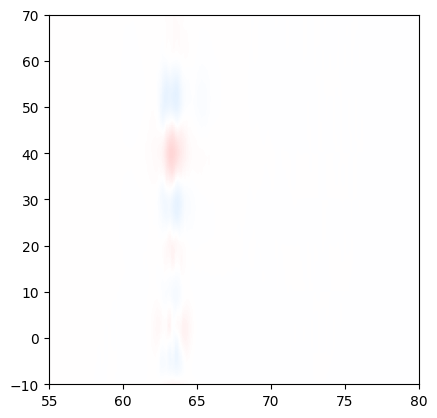

0.00207


In [128]:
print(Intens2d_plot.shape)
print(density.shape)
print(density_2d.shape)

norm_orig = Intens2d_plot/Intens2d_plot.sum()
norm_pred = density_2d/density_2d.sum()
print(norm_orig.max())
print(norm_pred.max())

resid = np.subtract(norm_orig, norm_pred)
residual_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FF0000', '#FFFFFF','#0080FF'], N=256)

fig, ax = plt.subplots()

#vmax = max(resid.max(), -resid.min())
vmax = 0.00207
ax.imshow(resid, cmap=residual_colormap, origin='lower', vmin=-vmax, vmax=vmax, 
          extent=(X_min, X_max, Y_min, Y_max), aspect=aspect)

plt.show()

print(vmax)

In [129]:
resid_sqs = resid * resid
mean_sqs = np.mean(resid_sqs)
rmsd = np.sqrt(mean_sqs)

print(rmsd)

2.5070934064259105e-05


[0, 10, 20, 30, 40, 50, 60, 70]
[0, 14, 28, 42, 56, 70, 84, 98]


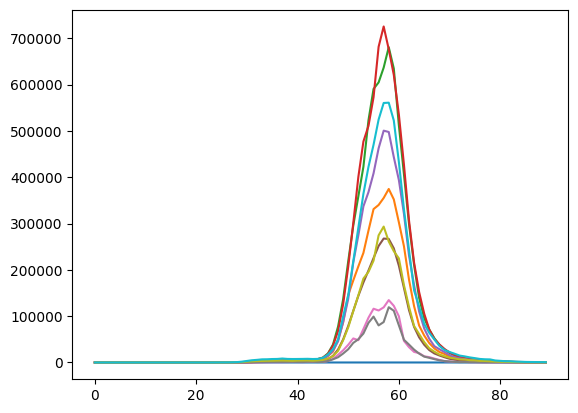

In [130]:
numbers1 = np.arange(0, 80, 10).tolist()
numbers2 = np.arange(0, 100, 14).tolist()
print(numbers1)
print(numbers2)

fig, ax = plt.subplots()

for i in range(0, 100, 10):
    ax.plot(Intens2d_plot[i,10:(n_smoothx//2)])
    #ax.legend()

plt.show()

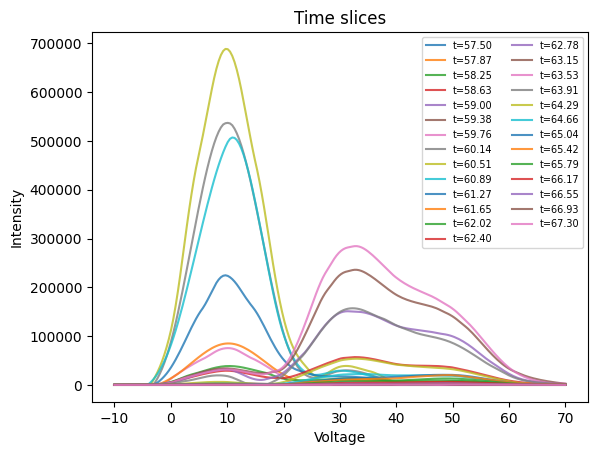

In [117]:
fig, ax = plt.subplots()
#the vertical range of numbers goes on the xaxis, the ith column of those numbers on the y
#X2d_plot = np.linspace(X_min, X_max, n_smooth) where n_smooth = 100
for i in range(20, len(X2d_plot)//2, 3):
    ax.plot(Y2d_plot, Intens2d_plot[:,i], label=f't={X2d_plot[i]:.2f}', alpha=0.8) # X_plot = np.linspace(0, 70, 100)[:, np.newaxis]

ax.set_title('Time slices')
ax.set_xlabel('Voltage')
ax.set_ylabel('Intensity')
ax.legend(fontsize=7, ncol=2)
plt.show()